In [17]:
import pandas as pd
import numpy as np

In [18]:
# Probabilidades por tirada. VALORES TEÓRICOS
# 0.6% hasta la 73, luego 6.6% en la 74 y las siguientes suman 6% cada una
P = [(i, min(1, 0.6e-2 if i <= 73 else 6.6e-2 + 6e-2*(i-74))) for i in range(1, 91)]
pulls = [] # Tirada n°
probs = [] # Probabilidad total por tirada
bases = [] # Probabilidad por tirada
total = [] # Probabilidad total (acumulada)
p_t = 0    # Probabilidad total (acumulada)

for i in range(len(P)):
  pull, p = P[i] # tirada n° y probabilidad de esa tirada
  pulls.append(pull)
  bases.append(p)
  if i > 0: # La primera tirada no depende de ninguna otra
    # Para llegar a la tirada n° i, se debe haber fallado todas las anteriores
    for j in range(0, i): 
      p *= 1 - P[j][1]
  p_t += p
  probs.append(p)
  total.append(p_t)

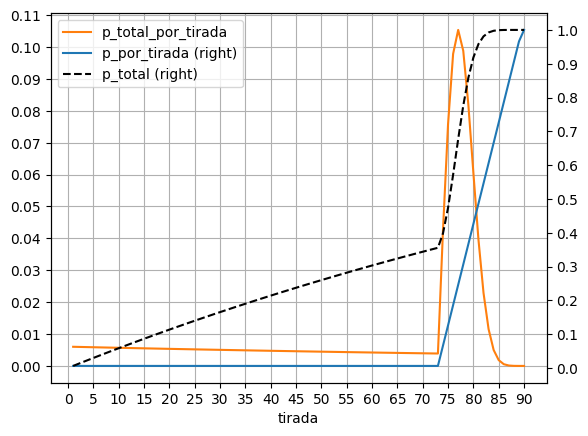

In [19]:
df = pd.DataFrame({
    "tirada": pulls,
    "p_total_por_tirada": probs,
    "p_por_tirada": bases,
    "p_total": total
  })
ax = df.plot(x="tirada", y="p_total_por_tirada", c="tab:orange")
df.plot(x="tirada", y="p_por_tirada", secondary_y=True, ax=ax, c="tab:blue")
df.plot(x="tirada", y="p_total", secondary_y=True, ax=ax, linestyle="dashed", c="black")
ax.set_xticks(np.arange(0, 95, 5))
ax.set_yticks(np.arange(0, 0.12, 0.01))
ax.right_ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.grid()

- `p_por_tirada`: La probabilidad de que "estando en la tirada x, se obtenga el 5 estrallas".
- `p_total_por_tirada`: La probabilidad de que "el 5* salga en la tirada x" ó "tenga que llegar exactamente a la tirada x para obtener el 5 estrellas".
- `p_total`: La probabilidad de que "el 5* salga en la tirada x o antes".

In [20]:
# Probabilidad de sacar hasta la 73
df[df["tirada"] <= 73]["p_total_por_tirada"].sum()

0.3555250210429846

In [21]:
# Probabilidad de sacar hasta la 79
df[df["tirada"] <= 79]["p_total_por_tirada"].sum()

0.8579278839541471

In [22]:
# Probabilidad de sacar entre la 74 y 79
df[(df["tirada"] >= 74) & (df["tirada"] <= 79)]["p_total_por_tirada"].sum()

0.5024028629111625

In [23]:
# Probabilidad de sacar hasta la 80
df[df["tirada"] <= 80]["p_total_por_tirada"].sum()

0.9184506053896802

In [24]:
# Probabilidad de sacar en la 84 o más
df[df["tirada"] >= 84]["p_total_por_tirada"].sum()

0.007497835968302176